In [1]:
!pip install xgboost

In [2]:
!pip install lightgbm

In [3]:
!pip3 install tensorflow

In [4]:
import os
dir = './submission/'

In [5]:
folder_list = os.listdir(dir)
folder_list

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

In [6]:
file_list = {}
for folder in folder_list:
    file_list[folder] = os.listdir(f'{dir}{folder}')

file_list

{'01': ['01_selection',
  '201642198.cpp',
  '201724409.py',
  '201724412.cpp',
  '201724461.cpp',
  '201724472.py',
  '201724485.cpp',
  '201724500.cpp',
  '201724525.py',
  '201724542.py',
  '201724543.cpp',
  '201724566.cpp',
  '201724579.cpp',
  '201724597.cpp',
  '201724601.cpp',
  '201724625.cpp',
  '201741161.cpp',
  '201745727.cpp',
  '201746121.cpp',
  '201761543.cpp',
  '201812145.cpp',
  '201824408.cpp',
  '201824409.cpp',
  '201824431.cpp',
  '201824446.py',
  '201824454.cpp',
  '201824470.cpp',
  '201824473.cpp',
  '201824480.cpp',
  '201824493.cpp',
  '201824522.py',
  '201824543.cpp',
  '201824557.cpp',
  '201824558.cpp',
  '201824564.cpp',
  '201824580.cpp',
  '201824594.py',
  '201824615.cpp',
  '201824616.cpp',
  '201824640.cpp',
  '201845729.cpp',
  '201924105.cpp',
  '201924472.py',
  '201924506.cpp',
  '201924596.cpp',
  '201924654.cpp',
  '201952108.cpp',
  '202055511.cpp',
  '202055512.cpp',
  '202055516.cpp',
  '202055521.py',
  '202055522.cpp',
  '202055527.cpp

In [7]:
from cpp_complexity import cal_complexity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
test_folder = 0

train = {
    "file": [],
    "distinct_func": [],
    "distinct_var": [],
    "number_func": [],
    "number_var": [],
    "depth": [],
    "LOC": [],
    "elegance": [],
    "elegance_label": [],

    "CCM": [],
    "length": [],
    "estimated_length": [],
    "volume": [],
    "difficulty": [],
    "effort": [],
}
test = {
    "file": [],
    "distinct_func": [],
    "distinct_var": [],
    "number_func": [],
    "number_var": [],
    "depth": [],
    "LOC": [],
    "elegance": [],
    "elegance_label": [],

    "CCM": [],
    "length": [],
    "estimated_length": [],
    "volume": [],
    "difficulty": [],
    "effort": [],
}

for folder in folder_list:
    selection_list = {}
    selection_list = os.listdir(f'{dir}{folder}/{folder}_selection')
    selected = {"file": [], "distinct_func": [], "distinct_var": [], "number_func": [], "number_var": [], "depth": [], "LOC": [], "elegance": []}

    for file in selection_list:
        res = {}
        if file.split('.')[-1] == 'cpp' or file.split('.')[-1] == 'c':
    #             print(file)
            try :
                res = cal_complexity(f'{dir}{folder}/{folder}_selection/' + file)
    #                 print(res)
                if(res['depth']!=0): 
                    selected['file'].append(file)
                    selected['distinct_func'].append(len(res['distinct_func']))
                    selected['distinct_var'].append(len(res['distinct_var']))
                    selected['number_func'].append(res['number_func'])
                    selected['number_var'].append(res['number_var'])
                    selected['depth'].append(res['depth'])
                    selected['LOC'].append(res['LOC'])
                    selected['elegance'].append(res['elegance'])
            except UnicodeDecodeError as decode_error:
                print(decode_error)
        else: selection_list.remove(file)
    #             print(file)

    selected_max = max(selected['elegance'])
    print(selected)
    
    folder_res = {
        "file": [],
        "distinct_func": [],
        "distinct_var": [],
        "number_func": [],
        "number_var": [],
        "depth": [],
        "LOC": [],
        "elegance": [],
        "elegance_label": [],

        "CCM": [],
        "length": [],
        "estimated_length": [],
        "volume": [],
        "difficulty": [],
        "effort": [],
    }
    # for folder in folder_list:
    for file in file_list[folder]:
        res = {}
        if file.split('.')[-1] == 'cpp' or file.split('.')[-1] == 'c':
    #             print(file)
#             try :
            res = cal_complexity(dir + folder + '/' + file)
    #                 print(res)
            if(res['depth']!=0): 
                if folder != folder_list[test_folder]:
                    train['file'].append(file)

                if folder == folder_list[test_folder]:
                    test['file'].append(file)

                folder_res['distinct_func'].append(len(res['distinct_func']))
                folder_res['distinct_var'].append(len(res['distinct_var']))
                folder_res['number_func'].append(res['number_func'])
                folder_res['number_var'].append(res['number_var'])
                folder_res['depth'].append(res['depth'])
                folder_res['LOC'].append(res['LOC'])
                folder_res['elegance'].append(res['elegance'])

                folder_res['CCM'].append(res['CCM'])
                folder_res['length'].append(res['length'])
                folder_res['estimated_length'].append(res['estimated_length'])
                folder_res['volume'].append(res['volume'])
                folder_res['difficulty'].append(res['difficulty'])
                folder_res['effort'].append(res['effort'])

                if selected_max < res['elegance']:
                    folder_res['elegance_label'].append(2)
                else:
                    folder_res['elegance_label'].append(1)

                for sel in selected['elegance']:
                    if sel == res['elegance']:
                        folder_res['elegance_label'][-1] = 0
#             except UnicodeDecodeError as decode_error:
#                 print(decode_error)
        else: file_list[folder].remove(file)
    #             print(file)
    
    col = ['distinct_func', 'distinct_var', 'number_func', 'number_var', 'depth', 'LOC', 'elegance', 'CCM', 'length', 'estimated_length', 'volume', 'difficulty', 'effort']

    for c in col:
        c_max = max(folder_res[c])
        for i in range(len(folder_res[c])):
            folder_res[c][i] = folder_res[c][i]/c_max
            
    for i in range(len(folder_res['elegance'])):
        if folder_res['elegance'][i] < 0.8 and folder_res['elegance_label'][i] == 2:
            folder_res['elegance_label'][i] = 1
    
    col = list(folder_res.keys())
    
    if folder != folder_list[test_folder]:
        for c in col:
            train[c] = train[c] + folder_res[c]
        
    if folder == folder_list[test_folder]:
        for c in col:
            test[c] = test[c] + folder_res[c]


    # print(results)
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

{'file': ['palin_s3.cpp', 'palin_s4.cpp', 'palin_s5.cpp'], 'distinct_func': [5, 5, 2], 'distinct_var': [17, 16, 9], 'number_func': [6, 7, 3], 'number_var': [77, 94, 34], 'depth': [5, 2, 4], 'LOC': [51, 51, 25], 'elegance': [206.7898400413379, 146.73581975062973, 65.78972365222945]}
<script>console.log(illegal character "문")</script>
<script>console.log(illegal character "자")</script>
<script>console.log(illegal character "열")</script>
<script>console.log(illegal character "의")</script>
<script>console.log(illegal character "개")</script>
<script>console.log(illegal character "수")</script>
<script>console.log(illegal character "문")</script>
<script>console.log(illegal character "자")</script>
<script>console.log(illegal character "열")</script>
<script>console.log(illegal character "의")</script>
<script>console.log(illegal character "길")</script>
<script>console.log(illegal character "이")</script>
<script>console.log(illegal character "문")</script>
<script>console.log(illegal character "자"

<script>console.log(illegal character "길")</script>
<script>console.log(illegal character "이")</script>
<script>console.log(illegal character "가")</script>
<script>console.log(illegal character "인")</script>
<script>console.log(illegal character "경")</script>
<script>console.log(illegal character "우")</script>
<script>console.log(illegal character "무")</script>
<script>console.log(illegal character "조")</script>
<script>console.log(illegal character "건")</script>
<script>console.log(illegal character "가")</script>
<script>console.log(illegal character "능")</script>
<script>console.log(illegal character "찾")</script>
<script>console.log(illegal character "으")</script>
<script>console.log(illegal character "면")</script>
<script>console.log(illegal character "탈")</script>
<script>console.log(illegal character "출")</script>
<script>console.log(illegal character "이")</script>
<script>console.log(illegal character "미")</script>
<script>console.log(illegal character "가")</script>
<script>cons

<script>console.log(illegal character "뒤")</script>
<script>console.log(illegal character "집")</script>
<script>console.log(illegal character "기")</script>
<script>console.log(illegal character "으")</script>
<script>console.log(illegal character "로")</script>
<script>console.log(illegal character "앞")</script>
<script>console.log(illegal character "에")</script>
<script>console.log(illegal character "서")</script>
<script>console.log(illegal character "부")</script>
<script>console.log(illegal character "터")</script>
<script>console.log(illegal character "또")</script>
<script>console.log(illegal character "는")</script>
<script>console.log(illegal character "뒤")</script>
<script>console.log(illegal character "에")</script>
<script>console.log(illegal character "서")</script>
<script>console.log(illegal character "부")</script>
<script>console.log(illegal character "터")</script>
<script>console.log(illegal character "를")</script>
<script>console.log(illegal character "결")</script>
<script>cons

{'file': ['money_s1.cpp'], 'distinct_func': [12], 'distinct_var': [28], 'number_func': [23], 'number_var': [157], 'depth': [4], 'LOC': [54], 'elegance': [405.87048173188646]}
<script>console.log(illegal character "'")</script>
<script>console.log(illegal character "À")</script>
<script>console.log(illegal character "Ô")</script>
<script>console.log(illegal character "·")</script>
<script>console.log(illegal character "Â")</script>
<script>console.log(illegal character "³")</script>
<script>console.log(illegal character "¡")</script>
<script>console.log(illegal character "이")</script>
<script>console.log(illegal character "일")</script>
<script>console.log(illegal character "때")</script>
<script>console.log(illegal character "과")</script>
<script>console.log(illegal character "의")</script>
<script>console.log(illegal character "계")</script>
<script>console.log(illegal character "산")</script>
{'file': ['slow_s3.cpp'], 'distinct_func': [10], 'distinct_var': [27], 'number_func': [11], 'numb

In [9]:
train_df

,file,distinct_func,distinct_var,number_func,number_var,depth,LOC,elegance,elegance_label,CCM,length,estimated_length,volume,difficulty,effort
0,201642198.cpp,0.642857,0.741935,0.576923,0.646552,0.285714,0.602564,0.327100,1,0.578947,0.648193,0.666432,0.627077,0.473923,0.338288
1,201724500.cpp,0.142857,0.483871,0.307692,0.603448,0.857143,0.602564,0.427086,1,0.684211,0.655422,0.452587,0.588996,0.481481,0.322812
2,201724543.cpp,0.214286,0.483871,0.269231,0.620690,0.571429,0.576923,0.370614,1,0.578947,0.614458,0.465108,0.555050,0.482237,0.304685
3,201724566.cpp,0.785714,0.483871,0.615385,0.431034,0.571429,0.641026,0.371878,1,0.368421,0.479518,0.532360,0.443710,0.458647,0.231651
4,201724579.cpp,1.000000,0.806452,0.961538,0.931034,0.428571,1.000000,0.622015,1,0.684211,0.874699,0.813348,0.877339,0.700717,0.699790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,202055547.cpp,0.631579,0.650000,0.500000,0.609756,0.666667,0.431034,0.289491,1,0.458333,0.539342,0.746552,0.519368,0.633415,0.337466
249,202055571.cpp,0.263158,0.650000,0.323529,0.653659,0.833333,0.534483,0.367930,1,0.541667,0.566524,0.684402,0.537111,0.638897,0.352015
250,202055574.cpp,0.578947,0.725000,1.000000,0.829268,1.000000,0.836207,0.819371,2,0.791667,0.766810,0.733866,0.736190,0.825785,0.623625
251,202055616.cpp,0.526316,0.675000,0.323529,0.604878,0.666667,0.431034,0.276046,0,0.458333,0.532189,0.647907,0.499538,0.594043,0.304406


In [10]:
test_df

,file,distinct_func,distinct_var,number_func,number_var,depth,LOC,elegance,elegance_label,CCM,length,estimated_length,volume,difficulty,effort
0,201724461.cpp,0.214286,0.458333,0.161290,0.336134,0.428571,0.383562,0.314482,1,0.2500,0.326667,0.498119,0.286272,0.323717,0.092671
1,201724500.cpp,0.285714,0.541667,0.258065,0.512605,0.571429,0.493151,0.481388,1,0.5625,0.497778,0.511718,0.438743,0.435952,0.191271
2,201724543.cpp,0.285714,0.750000,0.193548,0.747899,0.714286,0.767123,0.882852,2,0.7500,0.680000,0.613210,0.621528,0.493729,0.306867
3,201724566.cpp,0.214286,0.500000,0.161290,0.378151,0.714286,0.520548,0.385286,1,0.3750,0.375556,0.496528,0.329115,0.316652,0.104215
4,201724579.cpp,1.000000,1.000000,0.677419,1.000000,0.428571,1.000000,1.000000,2,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
5,201724597.cpp,0.857143,0.500000,0.580645,0.470588,0.714286,0.616438,0.650972,1,0.3750,0.493333,0.605361,0.448749,0.481246,0.215959
6,201724601.cpp,0.357143,0.541667,0.193548,0.655462,0.428571,0.602740,0.553455,1,0.5000,0.573333,0.570247,0.516343,0.507734,0.262165
7,201724625.cpp,0.142857,0.583333,0.064516,0.478992,0.714286,0.643836,0.507407,1,0.5625,0.446667,0.540829,0.398069,0.377760,0.150375
8,201741161.cpp,0.285714,0.708333,0.193548,0.361345,0.571429,0.410959,0.367812,1,0.3125,0.337778,0.538458,0.301028,0.257377,0.077478
9,201745727.cpp,0.214286,0.458333,0.225806,0.411765,0.714286,0.547945,0.426601,1,0.5000,0.460000,0.556267,0.412136,0.408026,0.168162


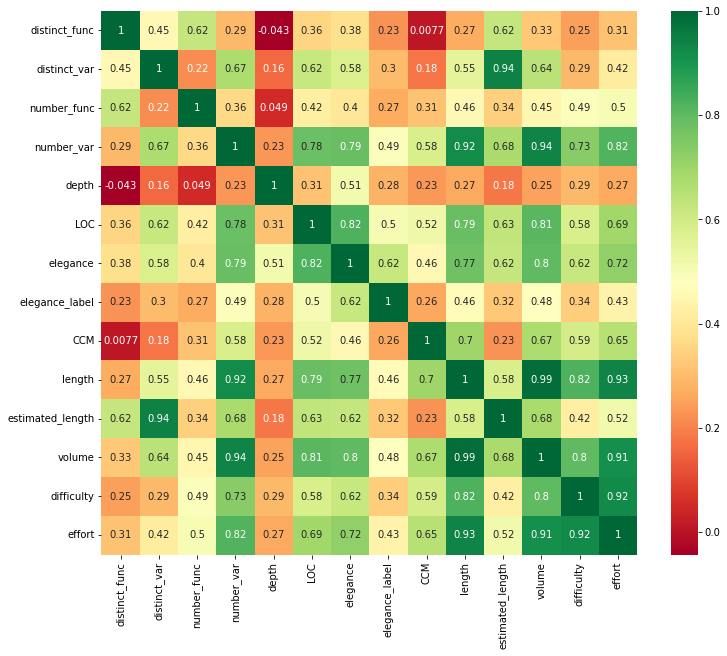

In [11]:
plt.figure(figsize=(12,10))
p=sns.heatmap(train_df.drop(['file'], axis=1).corr(), annot=True,cmap ='RdYlGn')

In [12]:
drop = ['file']

# drop = ['file', 'estimated_length']

# drop = ['file', 'distinct_func', 'estimated_length']

# drop = ['file', 'distinct_var', 'estimated_length']

# drop = ['file', 'distinct_func', 'distinct_var', 'estimated_length']

In [13]:
X_train = train_df.drop(drop+['elegance_label'], axis=1)
y_train = train_df['elegance_label']

X_test = test_df.drop(drop+['elegance_label'], axis=1)
y_test = test_df['elegance_label']

In [14]:
def check(y_test, y_pred):
    test_list = list(y_test)
    pred_list = list(y_pred)
    pred0_ans2 = 0
    pred2_ans0 = 0
    for i in range(len(y_test)):
        if test_list[i] == 2 and pred_list[i] == 0:
            pred0_ans2 += 1
        if test_list[i] == 0 and pred_list[i] == 2:
            pred2_ans0 += 1
    print(f"2인데 0으로 예측: {pred0_ans2/len(test_list)}, 0인데 2로 예측: {pred2_ans0/len(test_list)}")

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'결정 트리 Accuracy: {score}')
check(y_test, y_pred)

결정 트리 Accuracy: 0.8913043478260869
2인데 0으로 예측: 0.043478260869565216, 0인데 2로 예측: 0.0


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'랜덤 포레스트 Accuracy: {score}')
check(y_test, y_pred)

랜덤 포레스트 Accuracy: 0.9565217391304348
2인데 0으로 예측: 0.0, 0인데 2로 예측: 0.0


In [17]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {score}')
check(y_test, y_pred)

XGBoost Accuracy: 0.9347826086956522
2인데 0으로 예측: 0.0, 0인데 2로 예측: 0.0


In [18]:
y_pred

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [19]:
np.array(y_test)

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    test_scores.append(knn.score(X_test,y_test))
    
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 93.47826086956522 % and k = [3]


C:\Users\kkosy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


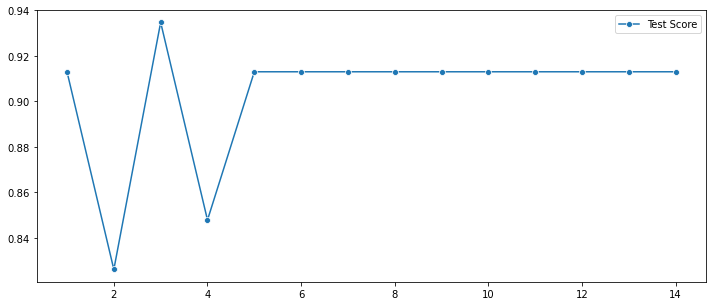

In [21]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [22]:
knn = KNeighborsClassifier(test_scores_ind[0]+1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

score = knn.score(X_test,y_test)
print(f'KNN Accuracy: {score}')
check(y_test, y_pred)

KNN Accuracy: 0.9347826086956522
2인데 0으로 예측: 0.0, 0인데 2로 예측: 0.0


## LGBM: data 양이 적을경우 사용 자제.......

In [23]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators = 400)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

y_pred = lgbm.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f'LGBM Accuracy: {score}')
check(y_test, y_pred)

C:\Users\kkosy\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\kkosy\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.355883
[2]	valid_0's multi_logloss: 0.328836
[3]	valid_0's multi_logloss: 0.306946
[4]	valid_0's multi_logloss: 0.290358
[5]	valid_0's multi_logloss: 0.275147
[6]	valid_0's multi_logloss: 0.260945
[7]	valid_0's multi_logloss: 0.251198
[8]	valid_0's multi_logloss: 0.240886
[9]	valid_0's multi_logloss: 0.232628
[10]	valid_0's multi_logloss: 0.220805
[11]	valid_0's multi_logloss: 0.215286
[12]	valid_0's multi_logloss: 0.210272
[13]	valid_0's multi_logloss: 0.203356
[14]	valid_0's multi_logloss: 0.201237
[15]	valid_0's multi_logloss: 0.196172
[16]	valid_0's multi_logloss: 0.192811
[17]	valid_0's multi_logloss: 0.19148
[18]	valid_0's multi_logloss: 0.186312
[19]	valid_0's multi_logloss: 0.184512
[20]	valid_0's multi_logloss: 0.183248
[21]	valid_0's multi_logloss: 0.184079
[22]	valid_0's multi_logloss: 0.182718
[23]	valid_0's multi_logloss: 0.179834
[24]	valid_0's multi_logloss: 0.180554
[25]	valid_0's multi_logloss: 0.180563
[26]	valid_0's multi_logloss: 0.178

In [24]:
import tensorflow as tf

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

y_train_enc = pd.get_dummies(y_train)

model.fit(X_train, y_train_enc, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.0634 - accuracy: 0.5257
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8904 - accuracy: 0.8340
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7172 - accuracy: 0.8458
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.8498
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.8498
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.8498
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.8498
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.8498
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.8498
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.8498
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9209
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9368
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9407
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.9328
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9368
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9407
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.9447
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9289
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9447
Epoch 93/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9486
Epoch 94/100
8/8 [===============

In [25]:
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

score = accuracy_score(y_test, y_pred)
print(f'tensorflow Accuracy: {score}')
check(y_test, y_pred)

2/2 [==============================] - 0s 3ms/step
tensorflow Accuracy: 0.9130434782608695
2인데 0으로 예측: 0.0, 0인데 2로 예측: 0.0


In [26]:
y_pred

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [27]:
np.array(y_test)

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [28]:
print(test_folder)
test_df

0


,file,distinct_func,distinct_var,number_func,number_var,depth,LOC,elegance,elegance_label,CCM,length,estimated_length,volume,difficulty,effort
0,201724461.cpp,0.214286,0.458333,0.161290,0.336134,0.428571,0.383562,0.314482,1,0.2500,0.326667,0.498119,0.286272,0.323717,0.092671
1,201724500.cpp,0.285714,0.541667,0.258065,0.512605,0.571429,0.493151,0.481388,1,0.5625,0.497778,0.511718,0.438743,0.435952,0.191271
2,201724543.cpp,0.285714,0.750000,0.193548,0.747899,0.714286,0.767123,0.882852,2,0.7500,0.680000,0.613210,0.621528,0.493729,0.306867
3,201724566.cpp,0.214286,0.500000,0.161290,0.378151,0.714286,0.520548,0.385286,1,0.3750,0.375556,0.496528,0.329115,0.316652,0.104215
4,201724579.cpp,1.000000,1.000000,0.677419,1.000000,0.428571,1.000000,1.000000,2,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
5,201724597.cpp,0.857143,0.500000,0.580645,0.470588,0.714286,0.616438,0.650972,1,0.3750,0.493333,0.605361,0.448749,0.481246,0.215959
6,201724601.cpp,0.357143,0.541667,0.193548,0.655462,0.428571,0.602740,0.553455,1,0.5000,0.573333,0.570247,0.516343,0.507734,0.262165
7,201724625.cpp,0.142857,0.583333,0.064516,0.478992,0.714286,0.643836,0.507407,1,0.5625,0.446667,0.540829,0.398069,0.377760,0.150375
8,201741161.cpp,0.285714,0.708333,0.193548,0.361345,0.571429,0.410959,0.367812,1,0.3125,0.337778,0.538458,0.301028,0.257377,0.077478
9,201745727.cpp,0.214286,0.458333,0.225806,0.411765,0.714286,0.547945,0.426601,1,0.5000,0.460000,0.556267,0.412136,0.408026,0.168162


In [30]:
model.save('elegance_model.h5')